<a href="https://colab.research.google.com/github/khaichiong/meco7312/blob/master/L5_SamplingDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, chi2, uniform

# Sampling distribution of the sample mean

Start with the data-generating process of $X_{1},\dots,X_{n} \sim_{i.i.d} N(\mu, \sigma^{2})$.

Consider the sample mean $\bar{X} = \frac{1}{n}\sum_{i}^{n} X_{i}$. We want to verify that the sampling distribution of the sample mean is $N(\mu,\sigma^2/n)$.


In [50]:
#first, set parameters of the DGP
n = 100 #sample size
mu = 1
sd = 2

In [51]:
#then, we perform s number of experiments. Each experiment consists of n random samples from the data generating process.
s = 1000 #number of experiments
x = np.random.normal(mu,sd,(n,s))

In [52]:
#take the sample mean of each experiment
sample_means = np.mean(x,axis=0)

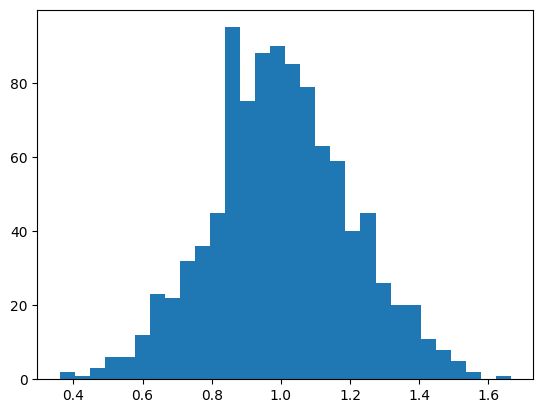

In [53]:
#plot the sampling distribution
plt.hist(sample_means,bins=30)
plt.show()

In [54]:
#Theoretically the sampling distribution is N(mu,sigma^2/n)

print('Simulated value:' + str(np.mean(sample_means)))
print('Theoretical value:' + str(mu))



Simulated value:1.0015904035913281
Theoretical value:1


In [56]:
print('Simulated value:' + str(np.var(sample_means)))
print('Theoretical value:' + str((sd**2)/n))


Simulated value:0.04130344470171075
Theoretical value:0.04


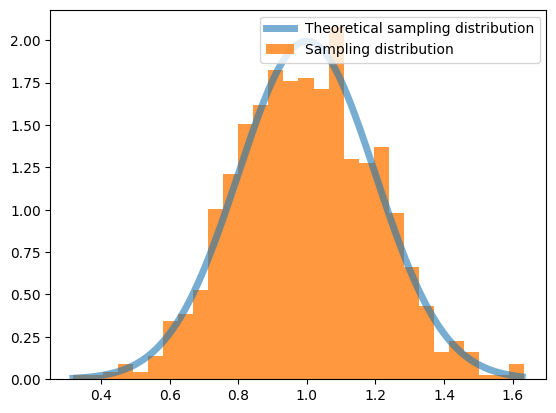

In [14]:
#Compare with the theoretical sampling density, N(mu,sigma^2/n)
z = np.arange(min(sample_means),max(sample_means),0.01)
fig, ax = plt.subplots(1, 1)
ax.plot(z,norm.pdf(z, mu, np.sqrt((sd**2)/n)),lw=5, alpha=0.6, label='Theoretical sampling distribution')
ax.hist(sample_means,bins=30,density=True, histtype='stepfilled', alpha=0.8, label='Sampling distribution')
ax.legend(loc='upper right')
plt.show()

# Sampling distribution of the sample variance

In [44]:
#first, set parameters of the DGP
n = 20 #sample size
mu = 1
sd = 2

In [45]:
#then, we perform s number of experiments. Each experiment consists of n random samples from the data generating process.
s = 1000 #number of experiments. use a large number
x = np.random.normal(mu,sd,(n,s))

In [46]:
#take the sample variance of each experiment
sample_var = np.var(x,axis=0,ddof=1)

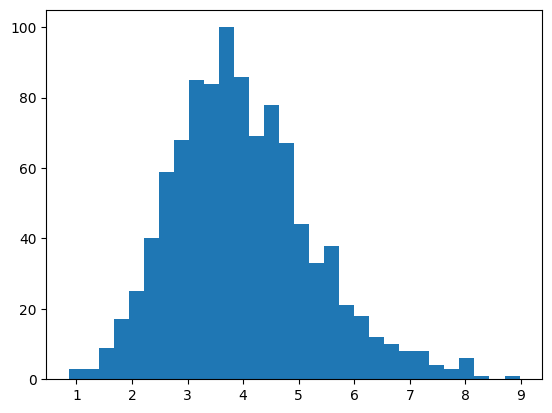

In [47]:
#plot the sampling distribution
plt.hist(sample_var,bins=30)
plt.show()

In [19]:
normalized_sample_var = (n-1)*sample_var/sd**2

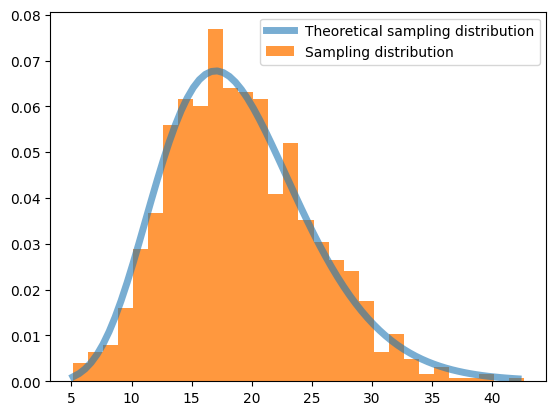

In [20]:
#Theoretically the sampling distribution of the sample variance is Chi-squared with n-1 degrees of freedom
z = np.arange(np.min(normalized_sample_var),np.max(normalized_sample_var),0.5)
fig, ax = plt.subplots(1, 1)
ax.plot(z,chi2.pdf(z, n-1),lw=5, alpha=0.6, label='Theoretical sampling distribution')
ax.hist(normalized_sample_var,bins=30,density=True, histtype='stepfilled', alpha=0.8, label='Sampling distribution')
ax.legend(loc='upper right')
plt.show()

In [48]:
#Theoretically, the expectation of the sample variance is sd^2, as the sample variance is an unbiased estimator of the population variance

print('Simulated value:' + str(np.mean(sample_var)))
print('Theoretical value:' + str(sd**2))


Simulated value:3.9967340919322947
Theoretical value:4


In [49]:
#The variance of the sample variance is 2*sd^4/(n-1)

print('Simulated value:' + str(np.var(sample_var)))
print('Theoretical value:' + str((2*sd**4)/(n-1)))


Simulated value:1.6265020153585068
Theoretical value:1.6842105263157894


# Sampling distribution of the standardized mean

The data-generating process is $X_{1},\dots,X_{n} \sim_{i.i.d} N(\mu, \sigma^{2})$.

Consider the statistic $(\bar{X} - \mu)/S$, where $S^{2}$ is the sample variance, and $\bar{x}$ is the sample mean.


In [126]:
#parameters of the DGP
n = 6 #sample size
mu = 1
sd = 2

In [127]:
s = 10000 #number of experiments
x = np.random.normal(mu,sd,(n,s))

In [128]:
sample_means = np.mean(x,axis=0)
sample_var = np.var(x,axis=0,ddof=1)

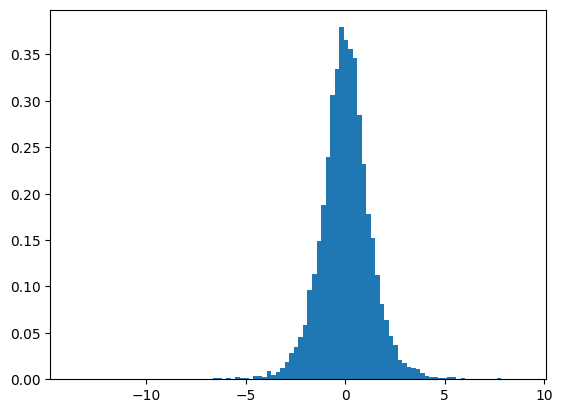

In [131]:
standardized_means = (sample_means-mu)/(np.sqrt(sample_var/n))
plt.hist(standardized_means,bins=100,density=True)
plt.show()

Compare with Student-t distribution with n-1 degrees of freedom.

In [134]:
print('Simulated value: ' + str(np.mean(standardized_means)))
print('Theoretical value: ' + str(0))

Simulated value: 0.01207696345503043
Theoretical value: 0


In [135]:
print('Simulated value: ' + str(np.var(standardized_means)))
print('Theoretical value: ' + str((n-1)/(n-3)))

Simulated value: 1.7122324197756693
Theoretical value: 1.6666666666666667


# Order statistics

## Order statistics for the Uniform distribution

Data generating process is $X_{1},\dots,X_{n} \sim U[0,1]$.

Consider the largest order statistic, $X_{(n)} = \max (X_{1},\dots,X_{n})$.

Use simulation to obtain the sampling distribution of the largest order statistic, then compare it with the theoretical quantity.

In [103]:
#set parameters of the DGP
n = 20 #sample size

In [104]:
#then, we perform s number of experiments. Each experiment consists of n random samples from the data generating process.
s = 10000
x = np.random.uniform(0,1,(n,s))

In [105]:
#find the largest observation for each experiment
xn = np.max(x,axis=0)

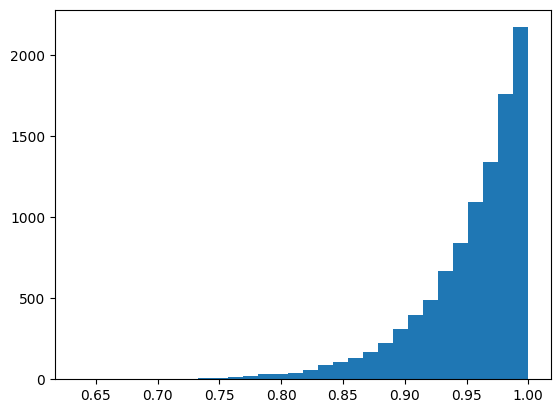

In [106]:
#plot the sampling distribution
plt.hist(xn,bins=30)
plt.show()

In [107]:
print('simulated value: ' + str(np.mean(xn))) #simulated mean of the sampling distribution
print('theoretical value: ' + str(n/(n+1)))


simulated value: 0.9529498267501958
theoretical value: 0.9523809523809523


Theoretically, the density of the largest order statistics for this DGP is $f(z) = n z^{n-1}$ for $z \in [0,1]$

In [108]:
#Compare with the theoretical pdf of largest order statistics
z = np.linspace(0.7,1,num = 200)
fx = n*z**(n-1)

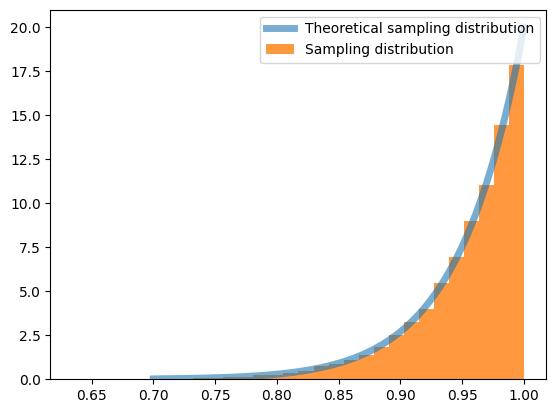

In [109]:
fig, ax = plt.subplots(1, 1)
ax.plot(z,fx,lw=5, alpha=0.6, label='Theoretical sampling distribution')
ax.hist(xn,bins=30,density=True, histtype='stepfilled', alpha=0.8, label='Sampling distribution')
ax.legend(loc='upper right')
plt.show()

## Second largest-order statistic

In [110]:
xn2 = np.partition(x, -2, axis=0)[-2]

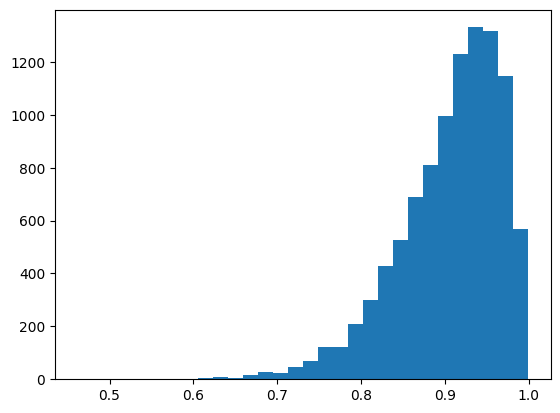

In [111]:
#plot the sampling distribution
plt.hist(xn2,bins=30)
plt.show()

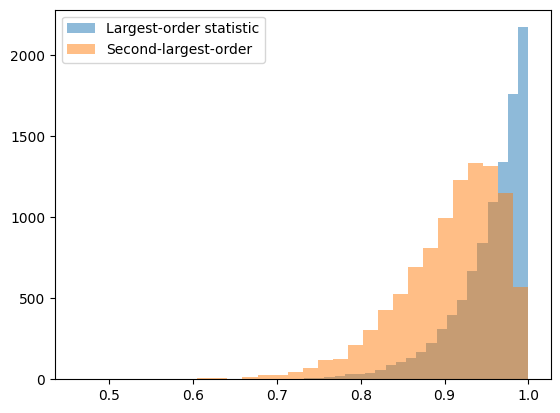

In [112]:
#overlay the histogram of xn and xn2
plt.hist(xn, bins=30, alpha=0.5, label='Largest-order statistic')
plt.hist(xn2, bins=30, alpha=0.5, label='Second-largest-order')
plt.legend(loc='upper left')
plt.show()

The cdf for the second-largest order statistic is ${n \choose n-1}F(x)^{n-1}(1-F(x))  +  F(x)^{n}$.

For the Uniform DGP, the cdf is $n x^{n-1} (1-x) + x^{n}$, and the pdf is $(n-1)n(1-x)x^{n-2}$, for $x \in [0,1]$, $n>2$.

In [113]:
#Compare with the theoretical density
z = np.linspace(0.7,1,num = 200)
fx = (n-1)*n*(1-z)*z**(n-2)

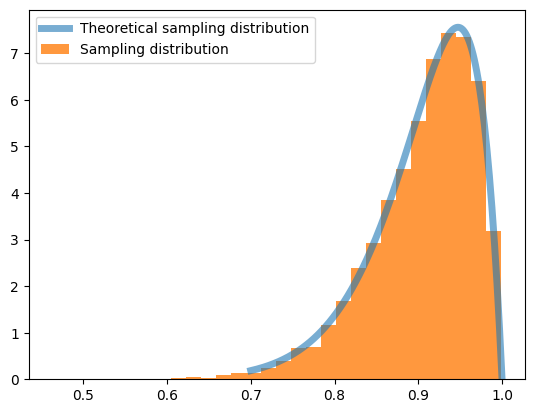

In [114]:
fig, ax = plt.subplots(1, 1)
ax.plot(z,fx,lw=5, alpha=0.6, label='Theoretical sampling distribution')
ax.hist(xn2,bins=30,density=True, histtype='stepfilled', alpha=0.8, label='Sampling distribution')
ax.legend(loc='upper left')
plt.show()



## Largest order statistics of Normal distribution

In [120]:
n=100
mu = 0
sd = 1

s = 10000
x = np.random.normal(mu,sd,(n,s))
xn = np.max(x,axis=0)


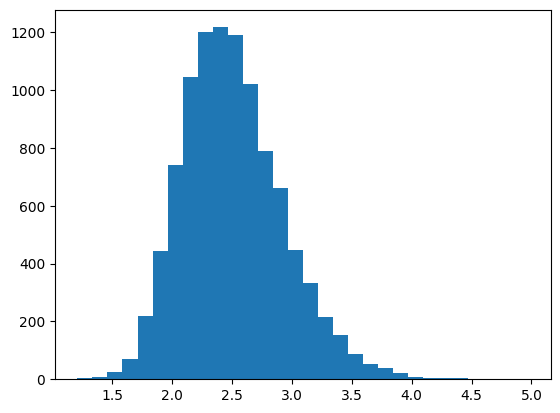

In [121]:
#plot the sampling distribution
plt.hist(xn,bins=30)
plt.show()

In [122]:
#Compare with the theoretical pdf of largest order statistics
z = np.linspace(min(xn),max(xn),num = 200)
fx = n*(norm.cdf(z,mu,sd)**(n-1))*norm.pdf(z,mu,sd)

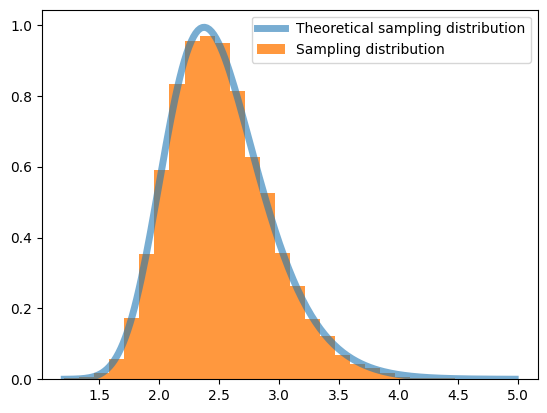

In [123]:
fig, ax = plt.subplots(1, 1)
ax.plot(z,fx,lw=5, alpha=0.6, label='Theoretical sampling distribution')
ax.hist(xn,bins=30,density=True, histtype='stepfilled', alpha=0.8, label='Sampling distribution')
ax.legend(loc='upper right')
plt.show()

In [124]:
def mean_largest_normal(n):
  s = 10000
  mu = 0
  sd = 1
  x = np.random.normal(mu,sd,(n,s))
  xn = np.max(x,axis=0)
  return np.mean(xn)

In [125]:
x_range = np.arange(50,500,5)
y = [mean_largest_normal(n) for n in x_range]